## Install and load packages

In [3]:
# Load libraries
library(tidyverse, warn.conflicts = FALSE)
library(raster, warn.conflicts = FALSE)
library(ggplot2, warn.conflicts = FALSE)
library(leaflet, warn.conflicts = FALSE)
library(dplyr, warn.conflicts = FALSE)
library(remotes, warn.conflicts = FALSE)
library(lubridate, warn.conflicts = FALSE)

# we only need to install these packages if you don't have them already
# rgdal is used to support geospatial data I/O
installed_packages_names <- rownames(installed.packages())
if (!"ohwobpg" %in% installed_packages_names) remotes::install_github("BigelowLab/ohwobpg", force = TRUE, quiet = TRUE)
if (!"rgdal" %in% installed_packages_names) install.packages("rgdal")

# Load ohwobpg package
library(ohwobpg)

## Initialize raster for visualization

Once the necessary packages are loaded, we will start by creating a raster object from a pre-loaded ohwobpg database.  Specifically, we will be creating a raster object of sea surface temperature (SST) data for 2018.

In [18]:
# Load database
path <- system.file("gom", package = "ohwobpg")
db <- read_database(path)

# Subset database
par_db <- db %>%
  dplyr::filter(param == "sst" &
                per == "MO" &
                dplyr::between(date, as.Date("2018-05-15"), as.Date("2018-09-26")))

# Create raster stack
sat <- par_db %>%                # start with the subset database
  as_filename(path = path) %>%   # build filenames and append to the path
  raster::stack()                # read them into a stack of images

# Name layers
names(sat) <- format(par_db$date, "%b")
sat

class      : RasterStack 
dimensions : 86, 110, 9460, 4  (nrow, ncol, ncell, nlayers)
resolution : 0.08333323, 0.08333309  (x, y)
extent     : -72.08333, -62.91667, 38.91668, 46.08332  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      :    Jun,    Jul,    Aug,    Sep 
min values :  5.945, 10.140, 12.525, 12.950 
max values : 27.505, 29.780, 30.230, 30.150 


In [30]:
# Read in buoy data
buoy <- read_buoy(buoy = "I01")
buoy

Time[GMT],temperature[C](1m),salinity[psu](1m),sigma_t[kg/m^3](1m),conductivity[msiemens/cm](1m)
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
2018-06-01 00:00:00,9.31,31.927,24.665,34.467
2018-06-01 00:30:00,9.31,31.926,24.664,34.466
2018-06-01 01:00:00,9.26,31.940,24.682,34.436
2018-06-01 01:30:00,8.90,31.970,24.762,34.153
2018-06-01 02:00:00,8.79,31.954,24.766,34.042
2018-06-01 02:30:00,8.81,31.948,24.759,34.054
2018-06-01 03:00:00,8.87,31.946,24.748,34.104
2018-06-01 03:30:00,8.87,31.951,24.752,34.109
2018-06-01 04:00:00,8.82,31.949,24.758,34.064


In [22]:
# Read in buoy locations
buoy_loc <- buoy_locations() %>%
    dplyr::filter(id == "I01") %>%
    dplyr::select(lon, lat)
buoy_loc

lon,lat
<dbl>,<dbl>
-68.11267,44.10167


## Extract buoy location from satellite data

The buoy location is extracted from the satellite data raster using the code below. For more examples of extracting point data from rasters and other raster manipulations, see https://mgimond.github.io/megug2017/#raster-manipulation-basics.

In [23]:
raster::extract(sat, buoy_loc)

Jun,Jul,Aug,Sep
11.365,13.39,15.595,14.73


## Plot buoy location and satellite data using leaflet

Finally, we will plot the satellite data and the buoy location on a leaflet interactive map.  The leaflet::addRasterImage() function allows the user to plot raster objects on the map.  The leaflet::addCircles() function allows the user to plot point data on the map.  For a more detailed example, see https://rstudio.github.io/leaflet/raster.html.

In [25]:
map <- leaflet::leaflet() %>% leaflet::addTiles(group = "Standard") %>%
            # Add satellite imagery
            leaflet::addProviderTiles('Esri.WorldImagery', group = "Satellite") %>%
            # Define bounds
            leaflet::fitBounds(lng1 = xmin(sat),
                               lat1 = ymin(sat),
                               lng2 = xmax(sat),
                               lat2 = ymax(sat)) %>%
            # Add raster data
            leaflet::addRasterImage(sat$Jul) %>%
            # Add buoy data
            leaflet::addCircles(lng = buoy_loc$lon, lat = buoy_loc$lat)
print(map)

Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded ellps WGS 84 in CRS definition: +proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs”
Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum WGS_1984 in CRS definition”
Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded ellps WGS 84 in CRS definition: +proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs”
Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum WGS_1984 in CRS definition”


## Plot time series of buoy and satellite data

Finally, we plot a time series of the buoy data and satellite data.  Both datasets are formatted to plot using the ggplot2 package.

In [26]:
# Format satellite data
sat_df <- tidyr::gather(as.data.frame(raster::extract(sat, buoy_loc)), month, value, Jun:Sep) %>%
  dplyr::mutate(month_num = 6:9)
sat_df

month,value,month_num
<chr>,<dbl>,<int>
Jun,11.365,6
Jul,13.390,7
Aug,15.595,8
Sep,14.730,9


In [34]:
# Format buoy data - use backticks for funny variable names
# first we add a month number
# then select Jun-Sep
# then compute monthly means
buoy_df <- buoy %>%
  dplyr::mutate(month_num = lubridate::month(`Time[GMT]`)) %>%
  dplyr::filter(dplyr::between(month_num, 6, 9)) %>%
  dplyr::group_by(month_num) %>%
  # Compute monthly average
  dplyr::summarise(mean = mean(`temperature[C](1m)`))
buoy_df

`summarise()` ungrouping output (override with `.groups` argument)



month_num,mean
<dbl>,<dbl>
6,9.341676
7,12.142361
8,14.185978
9,13.594586


Now we can plot these to compare the satellite to the buoy.  Keep in mind that the buoy SBE sensor is a 1 meter depth, and the satellite is measuring the skin temperature.

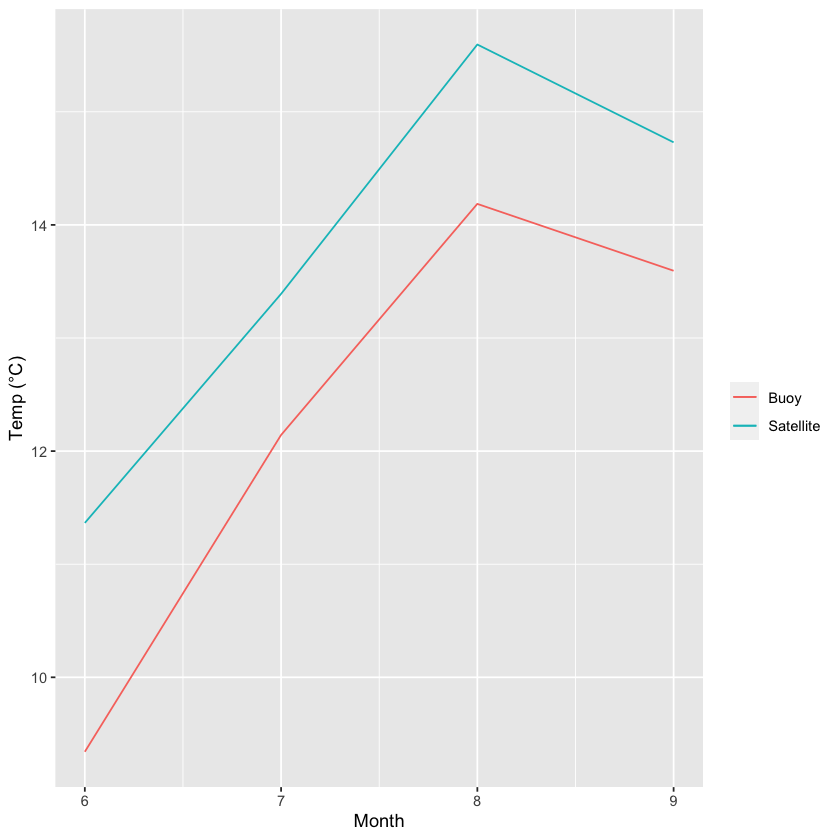

In [35]:
# Initialize colors
colors <- c("Satellite" = "red", "Buoy" = "blue")
# Plot time series of buoy and satellite data
ggplot(data = sat_df, mapping = aes(x = month_num, y = value, color = "Satellite")) +
  geom_path() +
  geom_path(data = buoy_df, aes(x = month_num, y = mean, color = "Buoy")) +
  labs(x = "Month",
       y = "Temp (°C)",
       color = "")